# Regresión basada en Redes Neuronales

Dependencias:
* torch
* matplotlib

In [1]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Definimos algunas variables necesarias
problema = "cuadrado"
ruido    = 0.8

In [3]:
torch.manual_seed(1)
torch.pi = torch.acos(torch.zeros(1)).item() * 2

In [4]:
if problema == "cuadrado":
    # Función cuadrado
    x = torch.linspace(-1, 1, 100)
    x = torch.unsqueeze(x, dim=1)
    y = x.pow(2) + ruido*torch.rand(x.size())
elif problema == "seno":
    # Función Seno
    x = torch.linspace(-3.1415, 3.1415, 200) * 2
    x = torch.unsqueeze(x, dim=1)
    y = torch.sin(x) + ruido*torch.rand(x.size())
else:
    print("Fución", problema, " no utilizada.")

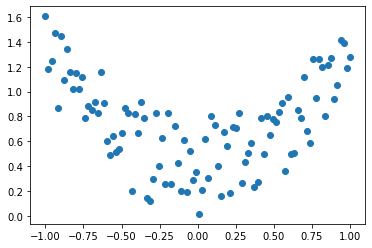

In [5]:
# Dibujamos la función
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [6]:
class Net(torch.nn.Module):
    def __init__(self, input_features):
        super(Net, self).__init__()
        self.hidden  = torch.nn.Linear(input_features, 10)
        self.output  = torch.nn.Linear(10, input_features)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.output(x)
        return x

In [7]:
net = Net(input_features=1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
)


In [8]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()  # ||y_true - y_pred||**2

In [9]:
plt.ion()

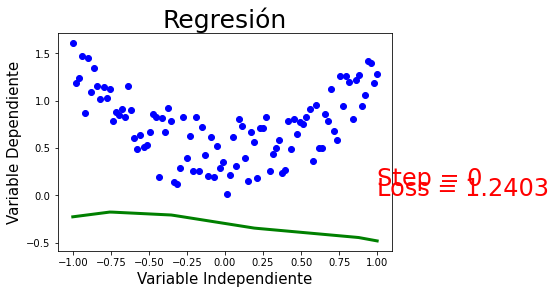

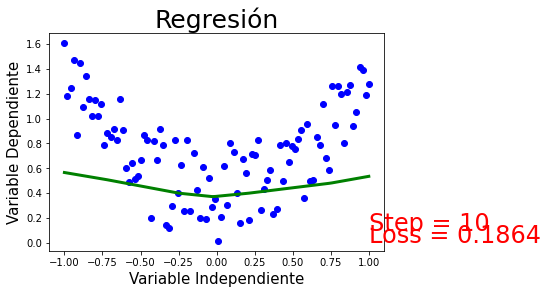

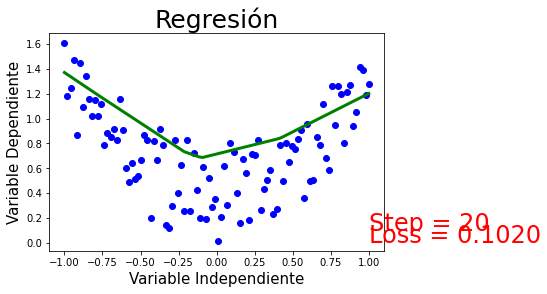

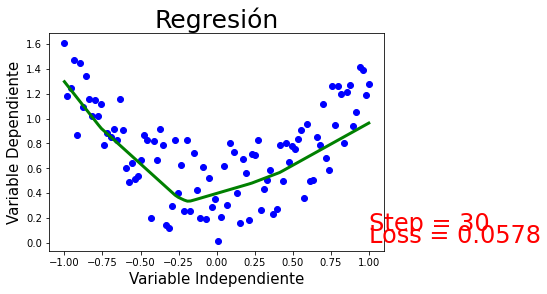

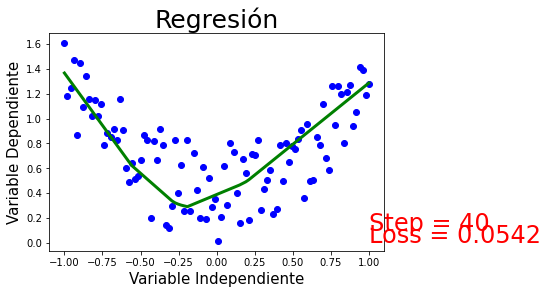

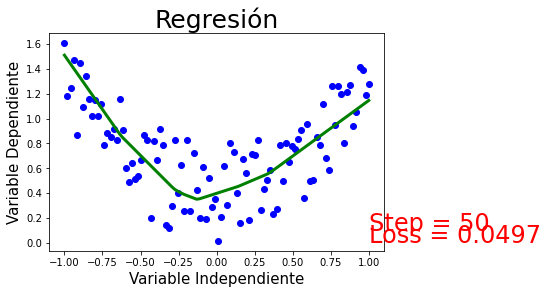

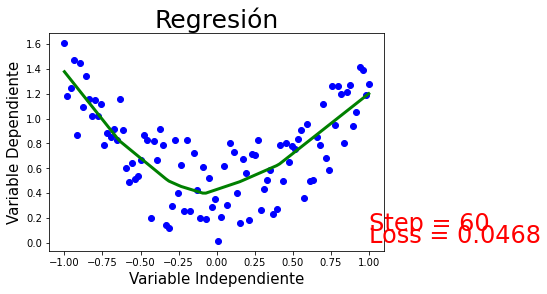

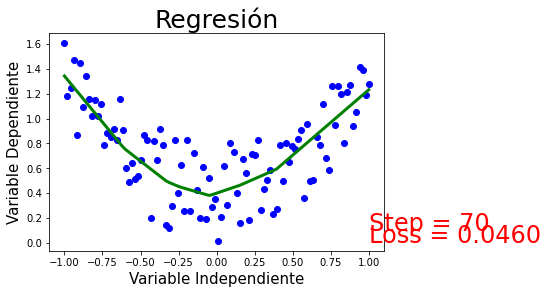

In [10]:
x, y = Variable(x), Variable(y)
for t in range(80):
    prediction = net(x)

    loss = loss_func(prediction, y)

    optimizer.zero_grad()   # Ponemos los gradientes a cero para la iteración
    loss.backward()         # backpropagation, Computamos los gradientes
    optimizer.step()        # Aplicamos los gradientes

    if t % 10 == 0:
        plt.cla()
        plt.title('Regresión', fontsize=25)
        plt.xlabel('Variable Independiente', fontsize=15)
        plt.ylabel('Variable Dependiente', fontsize=15)
        plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
        plt.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
        plt.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy(),
                fontdict={'size': 24, 'color':  'red'})
        plt.show()
        plt.pause(0.1)